Initial value: 10.600000000000001


<IPython.core.display.Javascript object>


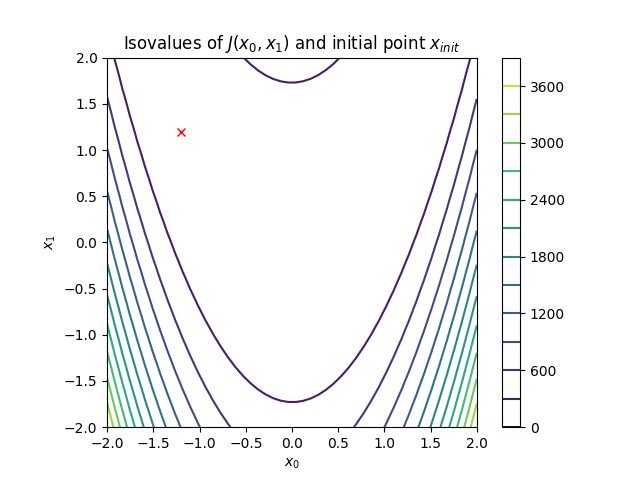

[-119.6  -48. ]


In [45]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from ipywidgets import *
%matplotlib notebook

x0 = np.array([-1.2,1.2])

m1 = 0.2
m2 = 0.9
Tol = 1e-16
Maxiter = 2000

def J(x):
    return 100*(x[1]-x[0]**2)**2+(1-x[0])**2
def GradJ(x):
    return np.array([200*(x[1]-x[0]**2)*(-2*x[0])-2*(1-x[0]),200*(x[1]-x[0]**2)])

analytic = [1,1]
print("Initial value:",J(x0))

plt.figure()
xmin=-2
xmax=2
ymin=-2
ymax=2
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)
plt.plot(x0[0],x0[1],'rx')
plt.axis('scaled')
plt.colorbar()
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Isovalues of $J(x_0,x_1)$ and initial point $x_{init}$')
plt.show()

print(GradJ(x0))

In [4]:
def gradientFixedStep(f,df,x_init,step=1e-03,tol=1e-06,maxiter=200):
    # initialization
    x=x_init.copy()
    xtab=[]
    ftab=[]
    xtab.append(x) # add x to the list xtab
    ftab.append(f(x))
    it=0 # iteration count
    while((it==0) or (it<maxiter and np.abs(f(xtab[-1])-f(xtab[-2]))>tol)):
        x=x-step*df(x)
        xtab.append(x)
        ftab.append(f(x))
        it=it+1
    # boolean to indicate the convergence
    if(it==maxiter):
        conv = False
    else:
        conv = True
    return xtab, ftab, conv

In [5]:
xtab,ftab,conv = gradientFixedStep(J,GradJ,x0)

Has the algorithm converged ? :  False


<IPython.core.display.Javascript object>


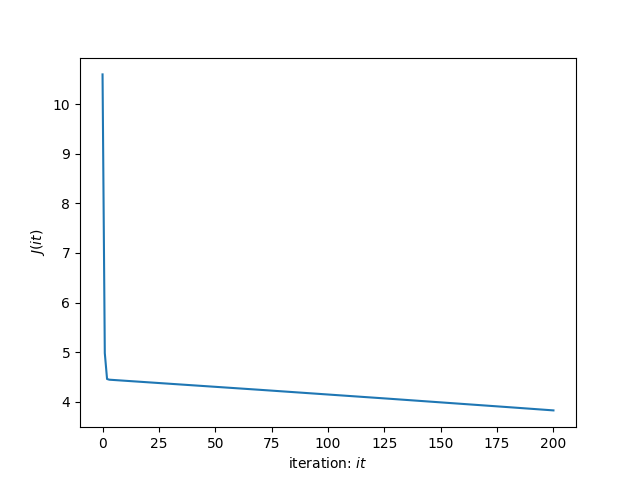

In [6]:
print('Has the algorithm converged ? : ',conv)
plt.figure()
plt.plot(ftab)
plt.xlabel('iteration: $it$')
plt.ylabel('$J(it)$')
plt.show()

<IPython.core.display.Javascript object>


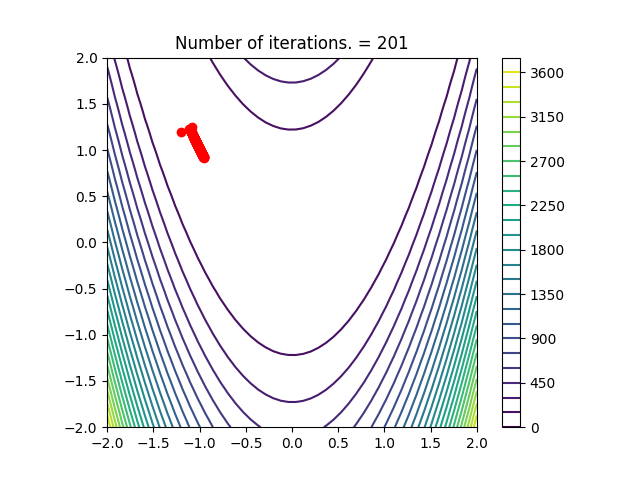

In [7]:
plt.figure()
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,25)

lx0=[X[0] for X in xtab]
lx1=[X[1] for X in xtab]
plt.plot(lx0,lx1,"-ro")
plt.title('Number of iterations. = '+str(np.shape(lx0)[0]))
plt.axis('scaled')
plt.colorbar()
plt.savefig('FixedStep001.png',dpi=300)

plt.show()

In [8]:
def gradientVariableStep(f,df,x_init,step=0.01,tol=1e-06,maxiter=200):
    # initialization
    maxstep = 10
    x=x_init.copy()
    xtab=[]
    ftab=[]
    xtab.append(x) # add x to the list xtab
    ftab.append(f(x))
    it=0 # iteration count
    while((it==0) or (it<maxiter and np.abs(f(xtab[-1])-f(xtab[-2]))>tol)):
        actx=x-step*df(x)
        if(f(actx)<f(x)):
            #accept iteration
            x = actx
            step = min(1.1*step,maxstep)
            xtab.append(x)
            ftab.append(f(x))
            it=it+1
        else:
            #refuse iteration
            step = 0.8*step
            
    # boolean to indicate the convergence
    if(it==maxiter):
        conv = False
    else:
        conv = True
    return xtab, ftab, conv

Has the algorithm converged ? :  False


<IPython.core.display.Javascript object>


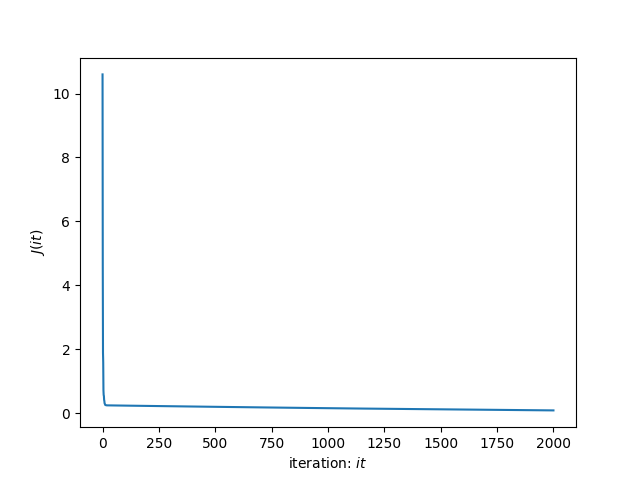

In [9]:
xtab3,ftab3,conv = gradientVariableStep(J,GradJ,x0,step=0.5,tol=1e-16,maxiter=2000)
print('Has the algorithm converged ? : ',conv)
plt.figure()
plt.plot(ftab3)
plt.xlabel('iteration: $it$')
plt.ylabel('$J(it)$')
plt.show()

<IPython.core.display.Javascript object>


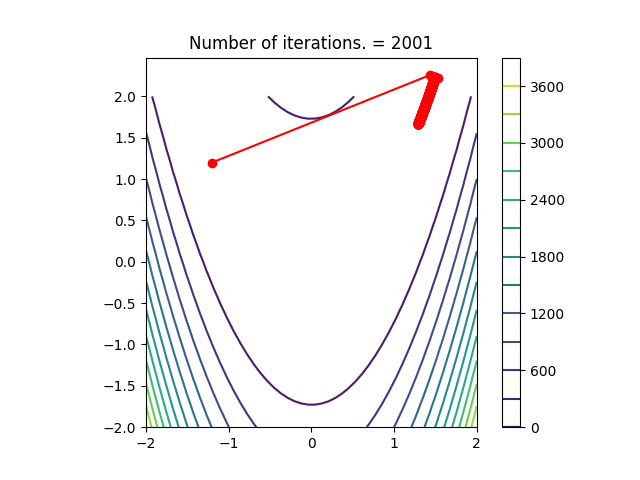

In [10]:
plt.figure()
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)

lx0=[X[0] for X in xtab3]
lx1=[X[1] for X in xtab3]
plt.plot(lx0,lx1,"-ro")

plt.axis('scaled')
plt.title('Number of iterations. = '+str(np.shape(lx0)[0]))
plt.colorbar()
plt.savefig('VariableStep.png',dpi=300)


plt.show()

In [42]:
def GDlinesearch(f,df,x0,tol,maxiter,m1,m2):
  Newton=0
  phist = []
  vhist = []
  ghist = []
  phist.append(x0)            # Create an array which holds the optimization history
 
  val = f(x0)
  gd   = df(x0)
  vhist.append(val)
  ghist.append(gd)
  iter = 1
  step = 0.1
  prevval = val
  H = [[802,-400],[-400,200]]
  print(H)
  Hinv = np.linalg.inv(H)
  v = np.linalg.eigvals(H)  
  print("Eigenvalues: ",v)
  while abs(step*np.linalg.norm(gd))>=Tol: 
    #Line search
    tl=0
    tr=0
    t=1
    # choice of the descent direction
    if Newton==0:
      if(iter<100):
        d = -gd
      else:
        d = -Hinv@gd
        print("Test descent direction: ",np.dot(d,gd))
    else:
      if(iter<100):
        d = -gd
      else:  
        H = np.array([[-400*(x0[1]-3*x0[0]**2)+2, -400*x0[0]],[-400*x0[1], 200]])
        Hinv = np.linalg.inv(H)
        d = -Hinv@gd

    #np.sqrt(abs((f(x0+step*d,v)-val)))/step<np.sqrt(abs(-(m1*(d*d))))
    while (1==1):
        qt = f(x0+t*d)
        qp = np.dot(gd,d)
        #print(tl," ",tr)
        if ((qt-val)/t<=(m1*qp)) and ((qt-val)/t>=(m2*qp)):
            step=t   # we found a good step
            break
        if ((qt-val)/t>(m1*qp)):
            # step too big
            tr = t
        if ((qt-val)/t<(m2*qp)):
            # step too small
            tl = t
        if(tr==0):
            t = 2*tl
        else:
            t = 0.5*(tl+tr)
        if abs(tr-tl)<1e-15*tr or tr<1e-15:
            break
            
    x0 = x0+step*(d)
    val = f(x0)
    gd   = df(x0)
    if(iter%10==0):
          print("Iter: ",iter,"| Val: ",val,"| Step: ",step," Grad: ",abs(gd))
    phist.append(x0)
    vhist.append(val)
    ghist.append(d)
    iter=iter+1
    if(iter>maxiter):
        print('Maximum number of iterations reached!')
        break
    #if(abs(val-prevval)<Tol):
        #print('Function does not decrease enough!')
        #break
    prevval = val
  if(np.linalg.norm(d)<Tol): 
    print('Algorithm converged!')
  print('')
  print('Final output:')
  print("Iter: ",iter,"| Val: ",val,"| Step: ",step," Grad: ",abs(gd))
  return phist,vhist,ghist

In [43]:
pp,vv,gg = GDlinesearch(J,GradJ,x0,Tol,Maxiter,m1,m2)

print('Number of iterations: ',len(pp))
print('Final position: ',pp[-1])
print('Analytical sol: ',analytic)



[[802, -400], [-400, 200]]
Eigenvalues:  [1.00160064e+03 3.99360767e-01]
Iter:  10 | Val:  4.357896367585597 | Step:  0.0078125  Grad:  [6.5037343  1.07188378]
Iter:  20 | Val:  4.15230231793814 | Step:  0.015625  Grad:  [6.67358692 1.25394932]
Iter:  30 | Val:  0.050593851476286485 | Step:  0.5  Grad:  [8.10796785 4.35545629]
Iter:  40 | Val:  0.004189474966056759 | Step:  0.001953125  Grad:  [0.01046706 0.07467743]
Iter:  50 | Val:  0.004101310813305078 | Step:  0.00390625  Grad:  [0.06544234 0.10313836]
Iter:  60 | Val:  0.004014288868368682 | Step:  0.001953125  Grad:  [0.04147341 0.08959919]
Iter:  70 | Val:  0.003930449660819503 | Step:  0.001953125  Grad:  [0.02498389 0.0800667 ]
Iter:  80 | Val:  0.003849068008318088 | Step:  0.001953125  Grad:  [0.01353675 0.07323683]
Iter:  90 | Val:  0.0037706463977687787 | Step:  0.00390625  Grad:  [0.08016973 0.10785024]
Test descent direction:  -0.007262302208299695
Iter:  100 | Val:  0.0013695240479304521 | Step:  1  Grad:  [1.48040346 0

<IPython.core.display.Javascript object>


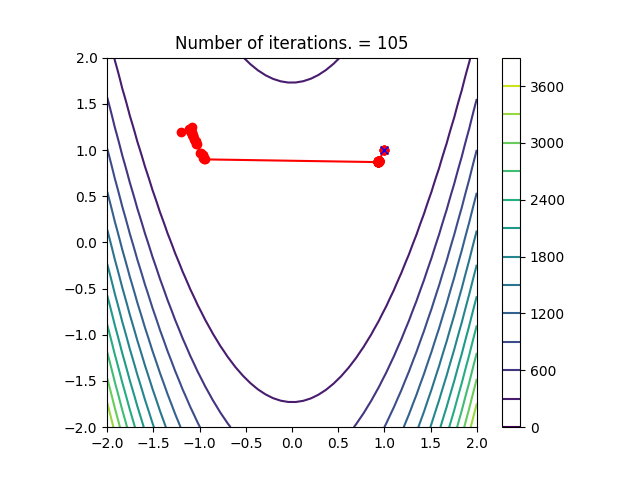

In [44]:
plt.figure()
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)

lx0=[X[0] for X in pp]
lx1=[X[1] for X in pp]
plt.plot(lx0,lx1,"-ro")

plt.plot(analytic[0],analytic[1],'-bx')


plt.axis('scaled')
plt.title('Number of iterations. = '+str(np.shape(lx0)[0]))
plt.colorbar()


plt.show()